In [1]:
from utils import *
from tqdm import tqdm
import os
import cv2

In [48]:
def run_rule(r,c,image,rulecode):
    if image[r-1,c-1]==0:
        if image[r-1,c]==0:
            if image[r-1,c+1]==0:
                image[r,c]=rulecode[0]*1
            else:
                image[r,c]=rulecode[1]*1
        else:
            if image[r-1,c+1]==0:
                image[r,c]=rulecode[2]*1
            else:
                image[r,c]=rulecode[3]*1
    else:
        if image[r-1,c]==0:
            if image[r-1,c+1]==0:
                image[r,c]=rulecode[4]*1
            else:
                image[r,c]=rulecode[5]*1
        else:
            if image[r-1,c+1]==0:
                image[r,c]=rulecode[6]*1
            else:
                image[r,c]=rulecode[7]*1


def generate_automata(nrule,niter, resolution=None, panoramic=False, video_mode=False, video_out="videos/video-0"):
    if resolution is None:
        shape = (niter,niter)
    elif isinstance(resolution, int):
        shape=(resolution, resolution)
    else:
        shape = resolution

    if video_mode:
        os.makedirs(f"{video_out}/frames", exist_ok=True)

    image=np.ones(shape)
    image[0,(shape[1]-1)//2]=0    
    rulecode = get_rulecode(nrule)

    i=0
    pbar = tqdm(range(1,niter))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or use 'XVID'
    out = cv2.VideoWriter(f"{video_out}/video.mp4", fourcc, 30, shape)
    frame_path = f"{video_out}/frame.png"
    for nraw in pbar:
        for ncol in range(1,shape[1]-1):
            run_rule(nraw,ncol,image,rulecode)
        if video_mode:
            pic, er = get_full_image(1-image, nrule=nrule)
            pic = color_image(pic, foreground_color=sns.color_palette("bright")[-2], background_color=sns.color_palette("bright")[4])
            fig = plot_clean(pic, expl_rect=er)
            plt.savefig(frame_path)
            pic = cv2.imread(frame_path)
            out.write(pic)
            #plt.close()
            #pbar.set_description(f"{video_out}/frames/frame_{i:04d}.png")
            i+=1
    out.release()

    if panoramic:
        image = image[niter//2:, :]
    return pic#1-image

def video_from_folder(frames_folder, video_path, fps=30):
    """
    Generate a video from images stored in a folder.
    
    Args:
    - frames_folder (str): Path to the folder containing the frames.
    - video_path (str): Path where the generated video should be saved.
    - fps (int, optional): Frames per second for the output video. Default is 30.
    
    Returns:
    - None
    """
    
    # List the files in the folder and sort them
    files = sorted([os.path.join(frames_folder, f) for f in os.listdir(frames_folder) if f.endswith('.png')])
    
    # Ensure there are images in the folder
    if not files:
        print("No images found in the specified directory!")
        return
    
    # Read the first image to get dimensions
    img = cv2.imread(files[0])
    height, width, layers = img.shape
    size = (width, height)
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or use 'XVID'
    out = cv2.VideoWriter(video_path, fourcc, fps, size)
    
    for file in files:
        img = cv2.imread(file)
        out.write(img)

    out.release()
    print(f"Video saved to {video_path}")

In [49]:
nrule = 30
niter = 501
resolution=(501, 501)

img = generate_automata(nrule, niter, resolution=resolution, video_mode=True)
#video_from_folder("videos/video-0/frames/", "videos/video-0/video.mp4")

  4%|▍         | 20/500 [00:09<03:30,  2.28it/s]/home/freddavide/Developer/graphic-cellular-automata/utils.py:257: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)
 36%|███▌      | 179/500 [01:12<02:16,  2.35it/s]

: 

In [44]:
img

array([[[139,  43, 226],
        [139,  43, 226],
        [139,  43, 226],
        ...,
        [139,  43, 226],
        [139,  43, 226],
        [139,  43, 226]],

       [[139,  43, 226],
        [139,  43, 226],
        [139,  43, 226],
        ...,
        [139,  43, 226],
        [139,  43, 226],
        [139,  43, 226]],

       [[139,  43, 226],
        [139,  43, 226],
        [139,  43, 226],
        ...,
        [139,  43, 226],
        [139,  43, 226],
        [139,  43, 226]],

       ...,

       [[139,  43, 226],
        [139,  43, 226],
        [139,  43, 226],
        ...,
        [139,  43, 226],
        [139,  43, 226],
        [139,  43, 226]],

       [[139,  43, 226],
        [139,  43, 226],
        [139,  43, 226],
        ...,
        [139,  43, 226],
        [139,  43, 226],
        [139,  43, 226]],

       [[139,  43, 226],
        [139,  43, 226],
        [139,  43, 226],
        ...,
        [139,  43, 226],
        [139,  43, 226],
        [139,  43, 226]]

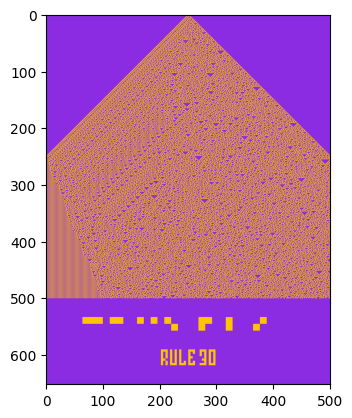

In [45]:
plt.imshow(img)

In [46]:
x = cv2.imread("images/rule_30_steps_150_image.png")
x.shape

(1000, 785, 3)

In [47]:
x

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [15]:
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [25]:
y, cr = get_full_image()
y = color_image(y, sns.color_palette("bright")[-2], sns.color_palette("bright")[4])

100%|██████████| 999/999 [00:00<00:00, 1729.98it/s]


In [26]:
img = cv2.convert

TypeError: 'int' object is not callable

4

In [9]:
def get_full_image(
        ca = None, 
        nrule = 30,
        niter = 1000, 
        resolution=1000,
        space_ratio = 1/15, 
        expl_ratio = 3/4, 
        tag_ratio = 1/5, 
        panoramic = False, 
        ):

    tag = generate_tag(nrule)
    expl = generate_explanation(nrule)
    if ca is None:
        ca = generate_automata(nrule, niter, resolution, panoramic = panoramic)
    h, w = ca.shape
    space = np.zeros((int(h*space_ratio),w))

    tag_length = w*tag_ratio
    up_ratio = int(tag_length/tag.shape[1])
    tag_length = tag.shape[1]*up_ratio
    tag = upscale_image(tag,up_ratio)
    tag_x0 = int((w-tag_length)//2)
    tag_x1 = tag_x0+tag.shape[1]
    tag_complete = np.zeros((tag.shape[0], w))
    tag_complete[:, tag_x0:tag_x1] = tag
    
    expl_length = w*expl_ratio
    up_ratio = int(expl_length/expl.shape[1])
    expl_length = expl.shape[1]*up_ratio
    expl = upscale_image(expl,up_ratio)
    expl_x0 = int((w-expl_length)//2)
    expl_x1 = expl_x0+expl.shape[1]
    expl_complete = np.zeros((expl.shape[0], w))
    expl_complete[:, expl_x0:expl_x1] = expl

    expl_y0 = ca.shape[0]+space.shape[0]
    expl_y1 = ca.shape[0]+space.shape[0]+expl_complete.shape[0]
    expl_rect = (expl_y0, expl_y1, expl_x0, expl_x1)

    img = np.concatenate([ca, space, expl_complete, space, tag_complete, space])
    
    return img, expl_rect

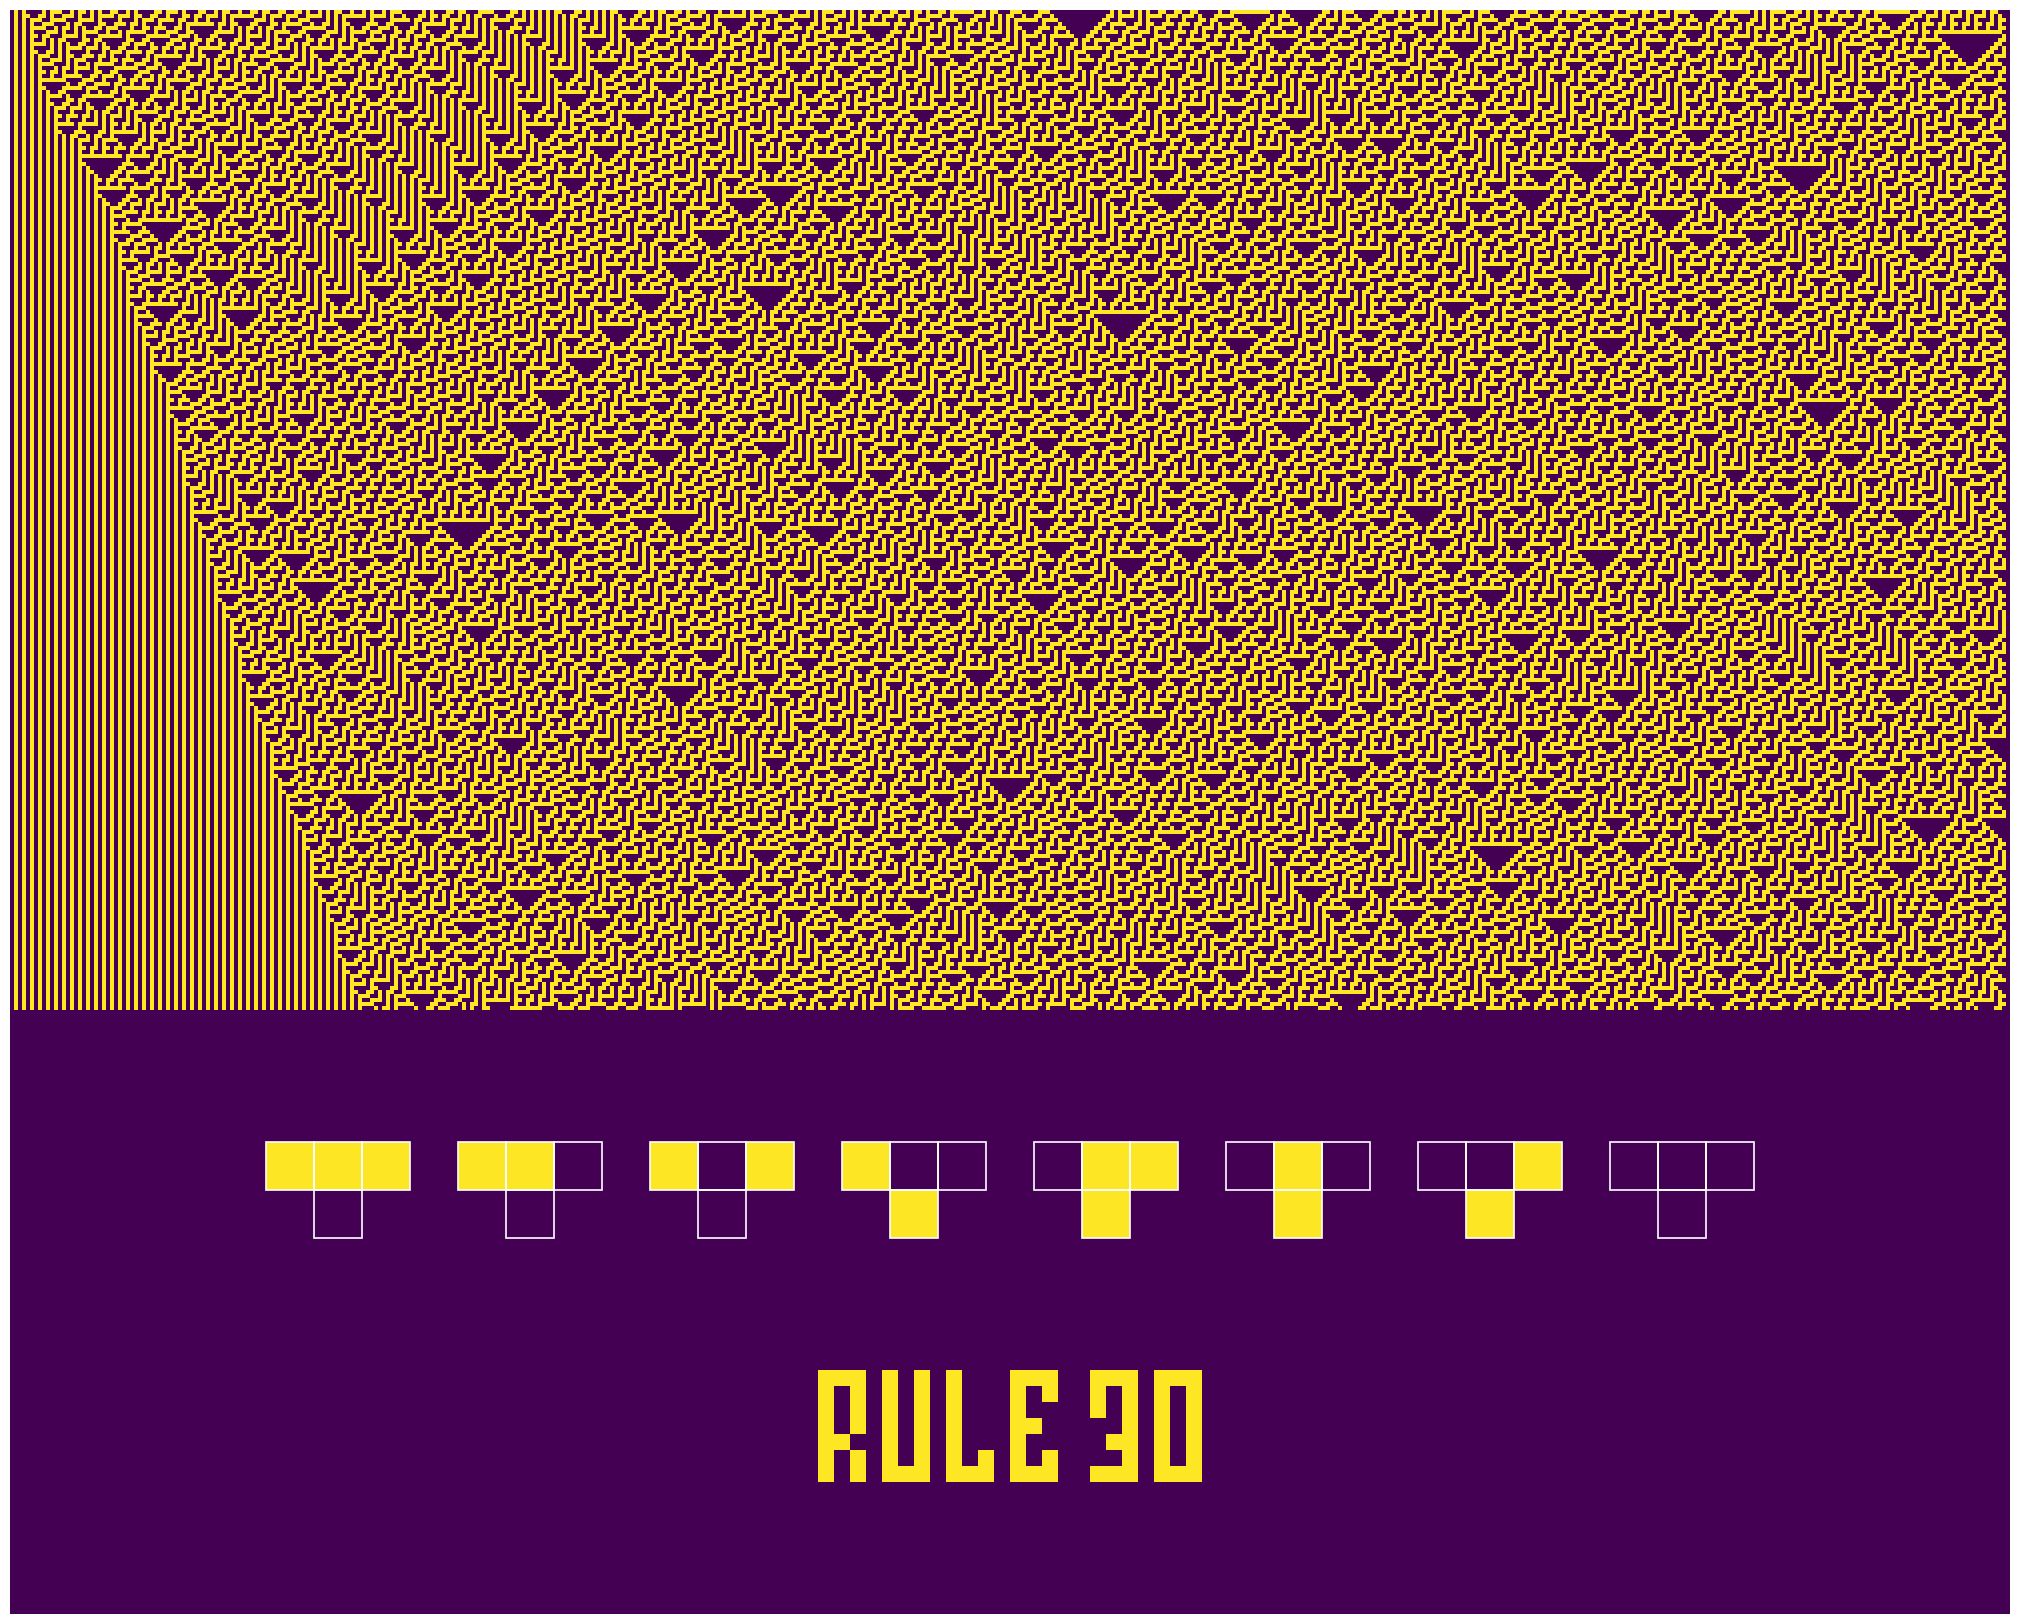

In [8]:
img, expl_rect = get_full_image(30, 500, panoramic=True)

plot_clean(img, expl_rect=expl_rect, color_rect="white")
plt.show()

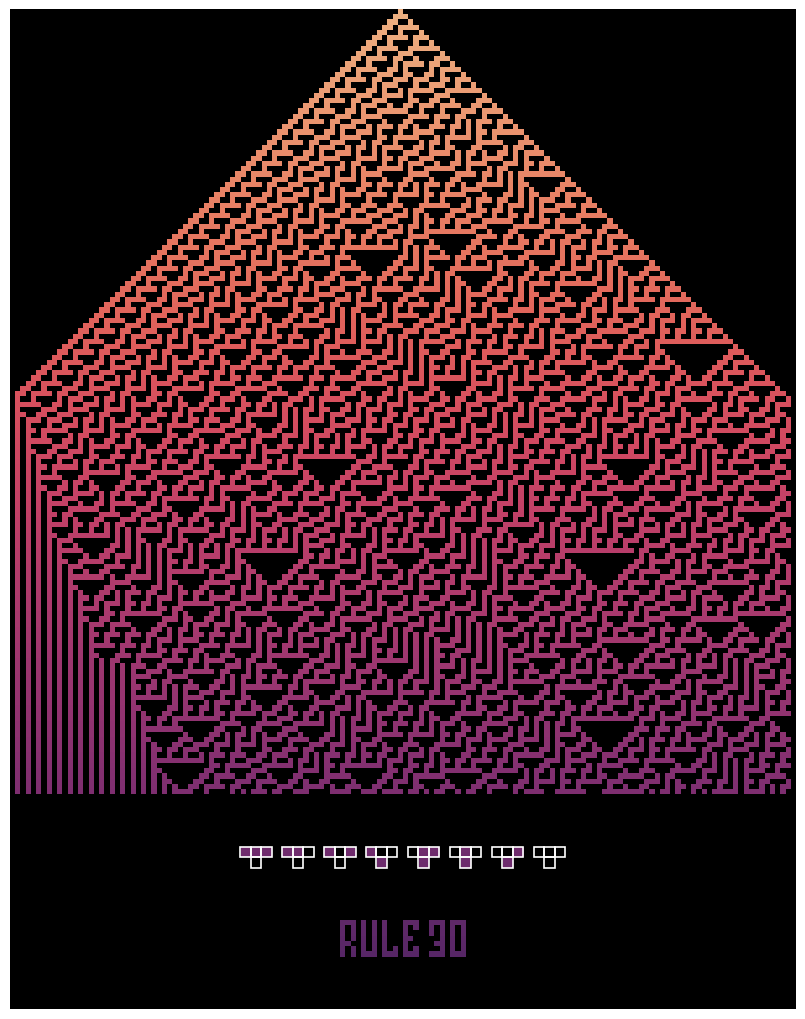

In [2]:
nrule = 30
niter = 150

img, expl_rect = get_full_image(nrule=nrule, niter=niter, expl_ratio=3/5)
final_img = np.zeros([img.shape[0], img.shape[1], 3])
colors = sns.color_palette("flare", as_cmap=True).colors

for i in range(img.shape[0]):
    index = int(i/img.shape[0]*256)
    for j in range(img.shape[1]):
        if img[i,j]:
            final_img[i,j] = colors[index]
fig = plot_clean(final_img, expl_rect=expl_rect, upscale=2, color_rect="white", figsize = (20,10))

In [3]:
import os
fig = plot_clean(final_img, expl_rect=expl_rect, upscale=2, color_rect="white", figsize = (20,10))
data_dir = "images"
os.makedirs(data_dir, exist_ok=True)
filename = f"{data_dir}/rule_{nrule}_steps_{niter}_image.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0, transparent=True, dpi=100)
plt.close()